In [3]:
import kagglehub
path = kagglehub.dataset_download("oktayrdeki/ddos-traffic-dataset")

/home/nishalahmed/Desktop/Codes/Python/DDOS Traffic/myenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
import pandas as pd
df = pd.read_csv(f"{path}/DDoS_dataset.csv")


In [7]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852585 entries, 0 to 852584
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Highest Layer    852585 non-null  object 
 1   Transport Layer  852585 non-null  object 
 2   Source IP        852585 non-null  int64  
 3   Dest IP          852585 non-null  object 
 4   Source Port      852585 non-null  int64  
 5   Dest Port        852585 non-null  int64  
 6   Packet Length    852585 non-null  int64  
 7   Packets/Time     852585 non-null  float64
 8   target           852585 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 58.5+ MB


,Highest Layer,Transport Layer,Source IP,Dest IP,Source Port,Dest Port,Packet Length,Packets/Time,target
0,ARP,UDP,1,192.168.1.1,0,0,60,92.8,1
1,ARP,UDP,0,192.168.1.10,0,0,42,92.9,0
2,ARP,UDP,1,192.168.1.1,0,0,60,362.8,1
3,ARP,UDP,0,192.168.1.12,0,0,42,362.8,0
4,ARP,UDP,1,192.168.1.1,0,0,60,364.3,1


In [8]:
# We need convert Highest Layer and Transprot Layer to numerical values, we do this with one hot encoding
# One hot encoding we create a new column for each unique value in the column like we do in Digital Design and put values of 1's and 0's.
# Sem one hot encoder from digital design
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown="ignore",sparse_output=False)
encoded = encoder.fit_transform(df[["Highest Layer","Transport Layer"]]) # This is a two D numpy array 
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(["Highest Layer","Transport Layer"]))

df = pd.concat([df,encoded_df],axis=1)
df.drop(columns=["Highest Layer","Transport Layer"],inplace=True)

In [9]:
# Cant scale IP addresses, so we drop them
df.drop(columns=["Source IP","Dest IP"],inplace=True)

In [10]:
# Not using tf.keras.layers.Normalization() because its not Z-score normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# We dont want to scale one hot coded columns so we select others
numericals = ["Source Port","Dest Port","Packet Length","Packets/Time"]

df[numericals] = scaler.fit_transform(df[numericals])

# This line computes the mean and std and then applies it to the data

#X_test = scaler.transform(X_test) 
# This line only applies the mean and std to the data
# Normalization only works for numerical data so we need to convert non numerical to numerical.

In [12]:
X = df.drop('target', axis=1)
y = df['target']

In [15]:
df["Packet Rate"] = df["Packets/Time"] / df["Packet Length"]
df.drop(columns=["Packets/Time"],inplace=True)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


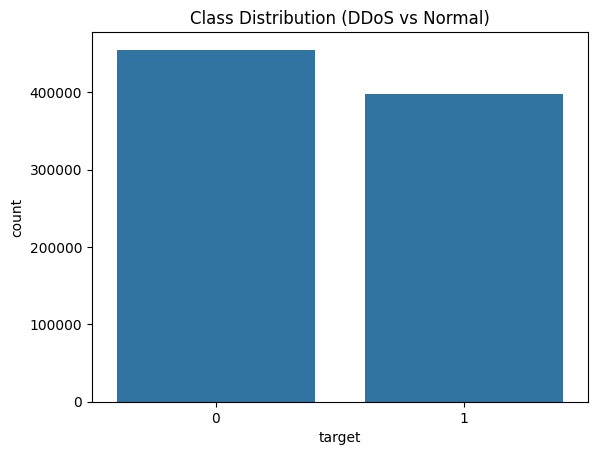

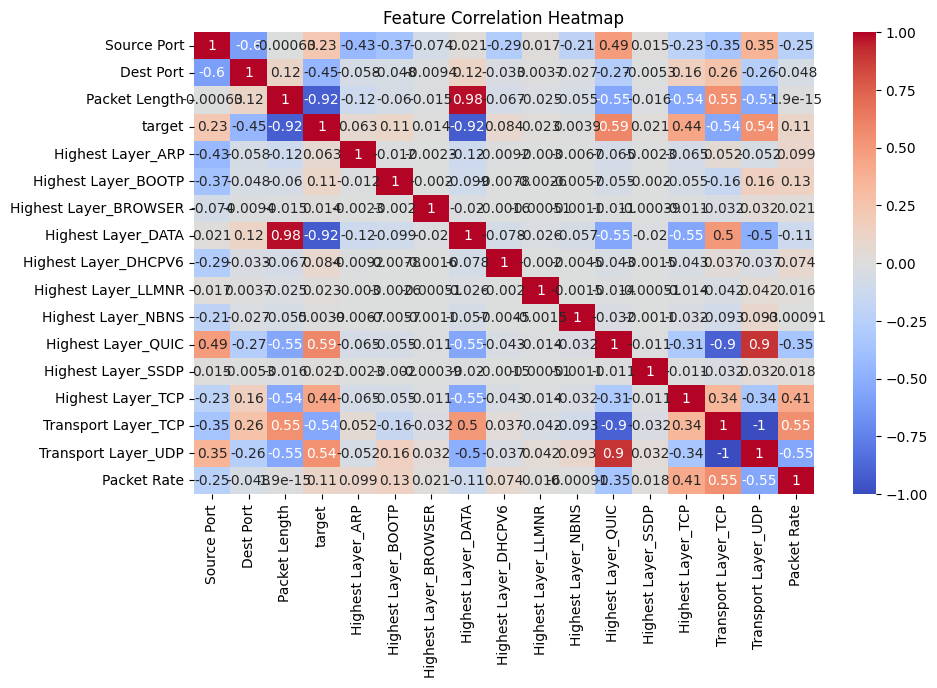

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check class distribution
sns.countplot(x=y)
plt.title("Class Distribution (DDoS vs Normal)")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(1,activation="sigmoid",input_shape=(X_train.shape[1],))
])

/home/nishalahmed/Desktop/Codes/Python/DDOS Traffic/myenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [74]:
model.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/10
21315/21315 ━━━━━━━━━━━━━━━━━━━━ 28s 1ms/step - accuracy: 0.9454 - loss: 0.1411 - val_accuracy: 0.9949 - val_loss: 0.0119
Epoch 2/10
21315/21315 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - accuracy: 0.9945 - loss: 0.0124 - val_accuracy: 0.9950 - val_loss: 0.0113
Epoch 3/10
21315/21315 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - accuracy: 0.9946 - loss: 0.0116 - val_accuracy: 0.9949 - val_loss: 0.0110
Epoch 4/10
21315/21315 ━━━━━━━━━━━━━━━━━━━━ 32s 1ms/step - accuracy: 0.9945 - loss: 0.0116 - val_accuracy: 0.9949 - val_loss: 0.0109
Epoch 5/10
21315/21315 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - accuracy: 0.9946 - loss: 0.0114 - val_accuracy: 0.9950 - val_loss: 0.0108
Epoch 6/10
21315/21315 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - accuracy: 0.9946 - loss: 0.0114 - val_accuracy: 0.9949 - val_loss: 0.0108
Epoch 7/10
21315/21315 ━━━━━━━━━━━━━━━━━━━━ 30s 1ms/step - accuracy: 0.9947 - loss: 0.0110 - val_accuracy: 0.9950 - val_loss: 0.0107
Epoch 8/10
21315/21315 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - accuracy: 

In [1]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

NameError: name 'model' is not defined

In [2]:
y_cap = model.predict(X_test)
y_cap = (y_cap > 0.5).astype(int)

NameError: name 'model' is not defined

In [ ]:
import joblib
model.save("ddos_logistic_regression.h5")

joblib.dump(scaler, "scaler.pkl")
joblib.dump(encoder, "encoder.pkl")